## Introduction:
This code is the part of UCW (Understanding Climate and Weather at local scale) project for BSc Environmental Science Program (ENSC304) at the Royal Roads University, Victoria, British Columbia, Canada. As a lecturer of the course, I have developed this code to analyze climate data and understand how the climate variables are evolving over time across British Columbia. The overall objective of this project is to quantify the amount of changes in temperature and rainfall at local level relative to the continental (i.e., North America) and/or global change. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### **Load Dataset**

In [2]:
data = pd.read_csv('/home/rudra/RRU/RRU-2021/UCW/Vancouver_International_Airport_for_Python.csv')

#### **Quick Review of Data Quality**

In [3]:
data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Mean Max Temp (°C),Mean Max Temp Flag,Mean Min Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow Grnd Last Day (cm),Snow Grnd Last Day Flag,Dir of Max Gust (10's deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-123.18,49.2,VANCOUVER INT'L A,1108447,Jan-37,1937,1,0.6,NaN,-8.1,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
1,-123.18,49.2,VANCOUVER INT'L A,1108447,Feb-37,1937,2,5.2,NaN,-1.3,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
2,-123.18,49.2,VANCOUVER INT'L A,1108447,Mar-37,1937,3,11.7,NaN,2.9,...,0.0,NaN,59.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-123.18,49.2,VANCOUVER INT'L A,1108447,Apr-37,1937,4,11.9,NaN,4.8,...,0.0,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-123.18,49.2,VANCOUVER INT'L A,1108447,May-37,1937,5,16.3,NaN,6.6,...,0.0,NaN,44.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,Longitude (x),Latitude (y),Climate ID,Year,Month,Mean Max Temp (°C),Mean Min Temp (°C),Mean Temp (°C),Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10's deg),Spd of Max Gust (km/h)
count,9.180000e+02,9.180000e+02,918.0,918.000000,918.000000,917.000000,917.000000,917.000000,917.000000,917.000000,915.000000,912.000000,914.000000,794.000000,674.000000,674.000000
mean,-1.231800e+02,4.920000e+01,1108447.0,1974.751634,6.480392,13.694547,6.319193,10.030643,19.160742,1.001309,90.259235,3.799890,93.862144,0.420655,23.188427,61.519288
std,2.786846e-12,4.265580e-13,0.0,22.096630,3.453879,5.831934,4.756281,5.270795,6.203553,6.384922,61.951452,11.737748,64.668326,2.952653,7.390314,15.050201
min,-1.231800e+02,4.920000e+01,1108447.0,1937.000000,1.000000,-2.900000,-9.700000,-6.300000,6.100000,-17.800000,0.000000,0.000000,0.000000,0.000000,6.000000,33.000000
25%,-1.231800e+02,4.920000e+01,1108447.0,1956.000000,3.000000,8.500000,2.300000,5.400000,13.400000,-3.400000,42.900000,0.000000,43.200000,0.000000,15.000000,51.000000
50%,-1.231800e+02,4.920000e+01,1108447.0,1975.000000,6.000000,13.200000,6.000000,9.600000,18.900000,0.800000,76.200000,0.000000,79.800000,0.000000,27.000000,59.000000
75%,-1.231800e+02,4.920000e+01,1108447.0,1994.000000,9.000000,19.000000,10.700000,14.900000,24.900000,6.700000,126.300000,0.000000,133.600000,0.000000,29.000000,70.000000
max,-1.231800e+02,4.920000e+01,1108447.0,2013.000000,12.000000,25.600000,15.600000,20.600000,34.400000,13.200000,350.800000,121.900000,350.800000,48.000000,32.000000,129.000000


In [5]:
data.isnull().sum() #checking missing values

Longitude (x)                   0
Latitude (y)                    0
Station Name                    0
Climate ID                      0
Date/Time                       0
Year                            0
Month                           0
Mean Max Temp (°C)              1
Mean Max Temp Flag            912
Mean Min Temp (°C)              1
Mean Min Temp Flag            912
Mean Temp (°C)                  1
Mean Temp Flag                912
Extr Max Temp (°C)              1
Extr Max Temp Flag            820
Extr Min Temp (°C)              1
Extr Min Temp Flag            760
Total Rain (mm)                 3
Total Rain Flag               911
Total Snow (cm)                 6
Total Snow Flag               824
Total Precip (mm)               4
Total Precip Flag             910
Snow Grnd Last Day (cm)       124
Snow Grnd Last Day Flag       906
Dir of Max Gust (10's deg)    244
Dir of Max Gust Flag          749
Spd of Max Gust (km/h)        244
Spd of Max Gust Flag          718
dtype: int64

#### **Select Features**

In [6]:
features = ['Longitude (x)', 'Latitude (y)', 'Year','Month','Mean Temp (°C)','Total Rain (mm)']

In [7]:
df = data[features]

In [8]:
df.head()

,Longitude (x),Latitude (y),Year,Month,Mean Temp (°C),Total Rain (mm)
0,-123.18,49.2,1937,1,-3.8,12.4
1,-123.18,49.2,1937,2,2.0,103.1
2,-123.18,49.2,1937,3,7.3,59.7
3,-123.18,49.2,1937,4,8.4,114.0
4,-123.18,49.2,1937,5,11.5,44.2


In [9]:
df.rename(columns={'Longitude (x)':'lon', 'Latitude (y)':'lat', 'Mean Temp (°C)':'Mean_Temp','Total Rain (mm)':'Total_Rain'}, inplace=True)

/home/rudra/my_env/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
df.head()

,lon,lat,Year,Month,Mean_Temp,Total_Rain
0,-123.18,49.2,1937,1,-3.8,12.4
1,-123.18,49.2,1937,2,2.0,103.1
2,-123.18,49.2,1937,3,7.3,59.7
3,-123.18,49.2,1937,4,8.4,114.0
4,-123.18,49.2,1937,5,11.5,44.2


In [11]:
df.isnull().sum()

lon           0
lat           0
Year          0
Month         0
Mean_Temp     1
Total_Rain    3
dtype: int64

#### **Filling Missing Values**

In [12]:
df['Mean_Temp'].median()

9.6

In [13]:
df['Total_Rain'].median()

76.2

In [14]:
df['Total_Rain'].fillna(df['Total_Rain'].median(),inplace=True)

/home/rudra/my_env/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
df['Mean_Temp'].fillna(df['Mean_Temp'].median(),inplace=True)

In [16]:
df.isnull().sum()

lon           0
lat           0
Year          0
Month         0
Mean_Temp     0
Total_Rain    0
dtype: int64

In [17]:
df.head()

,lon,lat,Year,Month,Mean_Temp,Total_Rain
0,-123.18,49.2,1937,1,-3.8,12.4
1,-123.18,49.2,1937,2,2.0,103.1
2,-123.18,49.2,1937,3,7.3,59.7
3,-123.18,49.2,1937,4,8.4,114.0
4,-123.18,49.2,1937,5,11.5,44.2


In [18]:
df.Year

0      1937
1      1937
2      1937
3      1937
4      1937
       ... 
913    2013
914    2013
915    2013
916    2013
917    2013
Name: Year, Length: 918, dtype: int64

In [19]:
2013-1937+1 #Number of years data

77

In [20]:
df[df['Year']==2012] # A full-year data

,lon,lat,Year,Month,Mean_Temp,Total_Rain
900,-123.18,49.2,2012,1,3.6,126.4
901,-123.18,49.2,2012,2,4.8,131.8
902,-123.18,49.2,2012,3,5.6,111.6
903,-123.18,49.2,2012,4,9.6,93.2
904,-123.18,49.2,2012,5,12.2,42.6
905,-123.18,49.2,2012,6,14.3,76.8
906,-123.18,49.2,2012,7,17.7,27.8
907,-123.18,49.2,2012,8,19.0,2.9
908,-123.18,49.2,2012,9,15.4,5.0
909,-123.18,49.2,2012,10,10.5,197.0


In [21]:
df[df['Year']==2013] # 2013 does not have full-year data

,lon,lat,Year,Month,Mean_Temp,Total_Rain
912,-123.18,49.2,2013,1,2.8,100.4
913,-123.18,49.2,2013,2,5.4,74.4
914,-123.18,49.2,2013,3,7.2,108.0
915,-123.18,49.2,2013,4,9.5,115.8
916,-123.18,49.2,2013,5,13.3,66.0
917,-123.18,49.2,2013,6,15.4,2.8


In [22]:
df = df.iloc[:912] # remove incomplete data i.e. 2013 has only 6-months data

In [23]:
df.Year

0      1937
1      1937
2      1937
3      1937
4      1937
       ... 
907    2012
908    2012
909    2012
910    2012
911    2012
Name: Year, Length: 912, dtype: int64

In [24]:
df.head()

,lon,lat,Year,Month,Mean_Temp,Total_Rain
0,-123.18,49.2,1937,1,-3.8,12.4
1,-123.18,49.2,1937,2,2.0,103.1
2,-123.18,49.2,1937,3,7.3,59.7
3,-123.18,49.2,1937,4,8.4,114.0
4,-123.18,49.2,1937,5,11.5,44.2


In [25]:
#convert pandas date objects to python date objects. 
#This conversion is needed because of matplotlib internal date conversion functions
dates = pd.date_range(start='1937-01', end='2012-12',freq='MS') #MS-month start

In [26]:
dates

DatetimeIndex(['1937-01-01', '1937-02-01', '1937-03-01', '1937-04-01',
               '1937-05-01', '1937-06-01', '1937-07-01', '1937-08-01',
               '1937-09-01', '1937-10-01',
               ...
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01'],
              dtype='datetime64[ns]', length=912, freq='MS')

In [27]:
df['datetime'] = [pd.to_datetime(date, format='%y%m').date() for date in dates]

In [28]:
df.head()

,lon,lat,Year,Month,Mean_Temp,Total_Rain,datetime
0,-123.18,49.2,1937,1,-3.8,12.4,1937-01-01
1,-123.18,49.2,1937,2,2.0,103.1,1937-02-01
2,-123.18,49.2,1937,3,7.3,59.7,1937-03-01
3,-123.18,49.2,1937,4,8.4,114.0,1937-04-01
4,-123.18,49.2,1937,5,11.5,44.2,1937-05-01


In [29]:
df.tail()

,lon,lat,Year,Month,Mean_Temp,Total_Rain,datetime
907,-123.18,49.2,2012,8,19.0,2.9,2012-08-01
908,-123.18,49.2,2012,9,15.4,5.0,2012-09-01
909,-123.18,49.2,2012,10,10.5,197.0,2012-10-01
910,-123.18,49.2,2012,11,7.2,162.8,2012-11-01
911,-123.18,49.2,2012,12,4.4,183.4,2012-12-01


## Data Visualizations

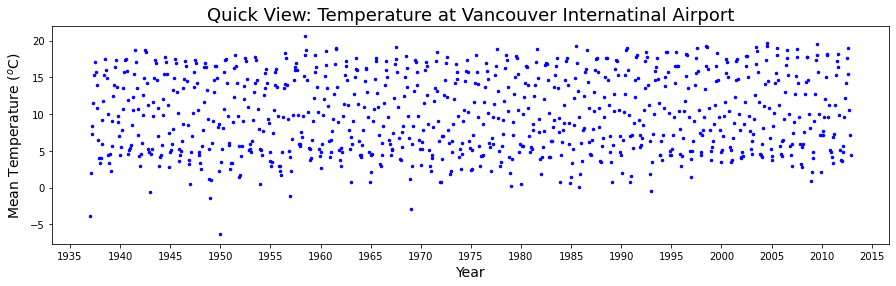

In [31]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
ax.plot(df['datetime'],df['Mean_Temp'],marker='.',markersize=5,color='b',linestyle='None')

loc = mdates.YearLocator(5)
ax.xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(fmt)

plt.xlabel('Year',fontsize=14)
plt.ylabel('Mean Temperature ($^o$C)',fontsize=14)
plt.title('Quick View: Temperature at Vancouver Internatinal Airport',fontsize=18)
plt.axis('tight')
plt.show()

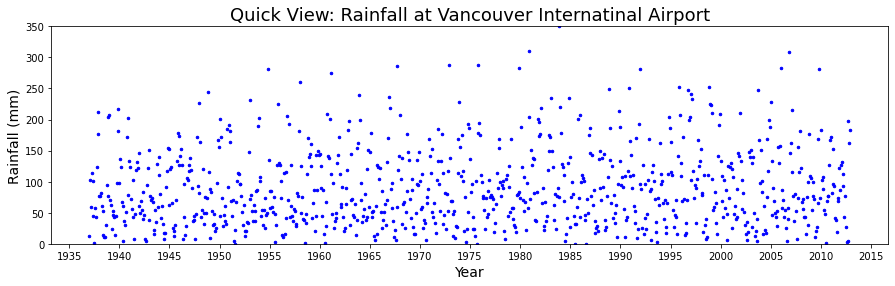

In [32]:
x = np.arange(912)
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
ax.plot(df['datetime'],df['Total_Rain'],marker='.',markersize=5,color='b',linestyle='None')

loc = mdates.YearLocator(5)
ax.xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(fmt)
ax.set_ylim([0,350])

plt.xlabel('Year',fontsize=14)
plt.ylabel('Rainfall (mm)',fontsize=14)
plt.title('Quick View: Rainfall at Vancouver Internatinal Airport',fontsize=18)

plt.show()

# Plot Annual and Monthly Profiles:

In [33]:
months = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
    
}
   

#### **1) Temperature**

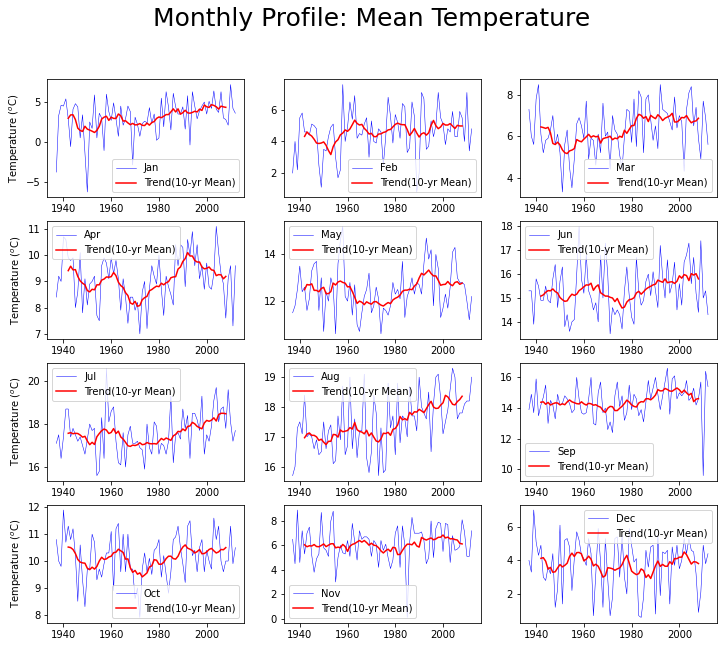

In [34]:
year_val = np.linspace(1937,2012,76)
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(12,10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    monthly_data = df[df['Month']==i+1]
    ax.plot(year_val,monthly_data.Mean_Temp,label=months.get(i+1),color='b',linewidth=0.5)
    window_10yrs = monthly_data['Mean_Temp'].rolling(window=10,center=True,min_periods=10).mean()
    ax.plot(year_val,window_10yrs, color='r',label='Trend(10-yr Mean)')
    ax.legend()
    
axes[0].set_ylabel('Temperature ($^o$C)')
axes[3].set_ylabel('Temperature ($^o$C)')
axes[6].set_ylabel('Temperature ($^o$C)')
axes[9].set_ylabel('Temperature ($^o$C)')


fig.suptitle('Monthly Profile: Mean Temperature',fontsize=25)
    
plt.show()

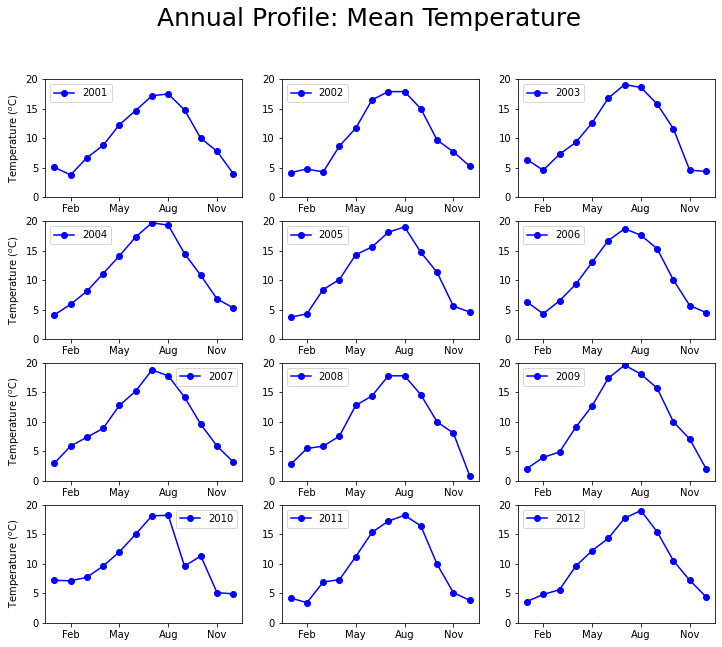

In [35]:
year = np.arange(2001,2013)
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(12,10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    yearly_data = df[df['Year']==year[i]]
    ax.plot(months.values(),yearly_data.Mean_Temp,'bo-',label=year[i])
    ax.set_ylim([0,20])
    ax.set_xticks(list(months.values())[1:12:3])
    ax.legend()  

axes[0].set_ylabel('Temperature ($^o$C)')
axes[3].set_ylabel('Temperature ($^o$C)')
axes[6].set_ylabel('Temperature ($^o$C)')
axes[9].set_ylabel('Temperature ($^o$C)')

fig.suptitle('Annual Profile: Mean Temperature',fontsize=25)
    
plt.show()

#### **2) Total Rainfall**

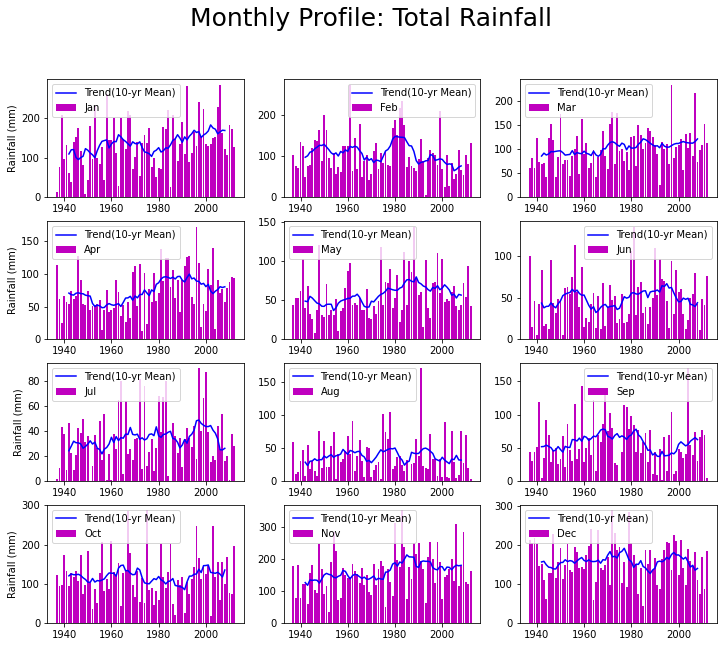

In [36]:
year_val = np.linspace(1937,2012,76)
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(12,10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    monthly_data = df[df['Month']==i+1]
    ax.bar(year_val,monthly_data.Total_Rain,label=months.get(i+1),color='m')
    window_10yrs = monthly_data['Total_Rain'].rolling(window=10,center=True,min_periods=10).mean()
    ax.plot(year_val,window_10yrs, color='b',label='Trend(10-yr Mean)')
    ax.legend()
    
axes[0].set_ylabel('Rainfall (mm)')
axes[3].set_ylabel('Rainfall (mm)')
axes[6].set_ylabel('Rainfall (mm)')
axes[9].set_ylabel('Rainfall (mm)')

fig.suptitle('Monthly Profile: Total Rainfall',fontsize=25)
    
plt.show()


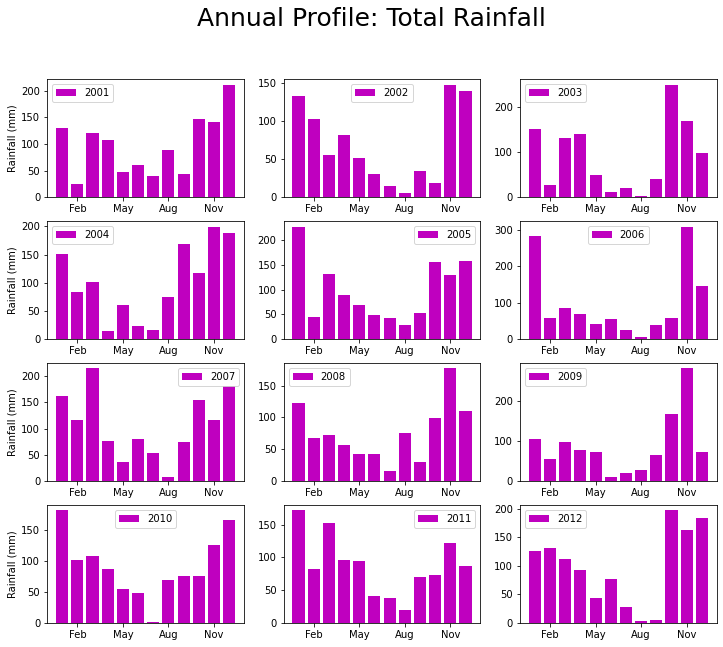

In [37]:
year = np.arange(2001,2013)
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(12,10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    yearly_data = df[df['Year']==year[i]]
    ax.bar(months.values(),yearly_data.Total_Rain,label=year[i],color='m')
    ax.set_xticks(list(months.values())[1:12:3])
    ax.legend() 
    
axes[0].set_ylabel('Rainfall (mm)')
axes[3].set_ylabel('Rainfall (mm)')
axes[6].set_ylabel('Rainfall (mm)')
axes[9].set_ylabel('Rainfall (mm)')

fig.suptitle('Annual Profile: Total Rainfall',fontsize=25)
    
plt.show()

## Monthly Mean:

In [38]:
Monthly_Mean = np.round(df.groupby('Month').mean(),1)
Monthly_Mean

,lon,lat,Year,Mean_Temp,Total_Rain
Month,,,,,
1,-123.2,49.2,1974.5,3.1,135.4
2,-123.2,49.2,1974.5,4.6,104.8
3,-123.2,49.2,1974.5,6.3,101.9
4,-123.2,49.2,1974.5,9.1,73.5
5,-123.2,49.2,1974.5,12.5,57.1
6,-123.2,49.2,1974.5,15.3,48.6
7,-123.2,49.2,1974.5,17.6,32.7
8,-123.2,49.2,1974.5,17.5,36.9
9,-123.2,49.2,1974.5,14.5,56.7


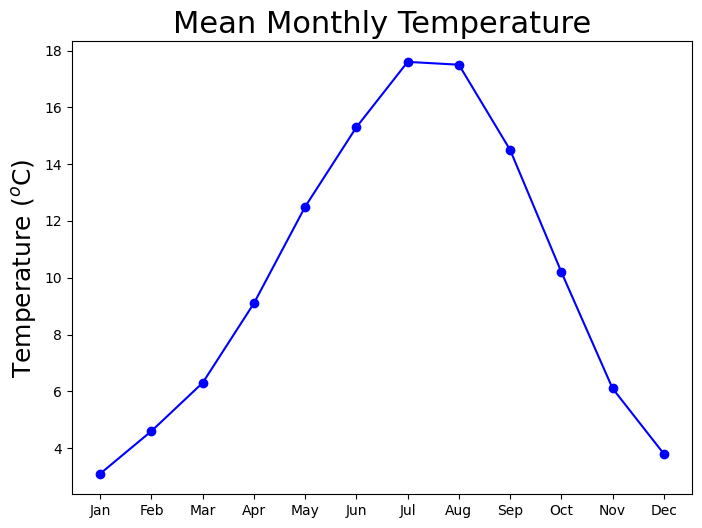

In [39]:
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(111)
ax.plot(months.values(), Monthly_Mean.Mean_Temp,'bo-')
plt.ylabel('Temperature ($^{o}$C)',fontsize=18)
plt.title('Mean Monthly Temperature', fontsize=22)
plt.show()

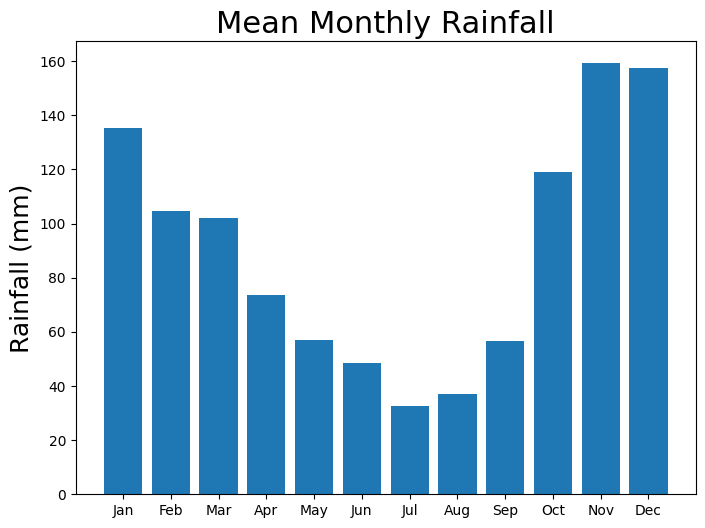

In [40]:
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(111)
ax.bar(months.values(), Monthly_Mean.Total_Rain)
plt.ylabel('Rainfall (mm)',fontsize=18)
plt.title('Mean Monthly Rainfall', fontsize=22)
plt.show()

# Seasonal Mean:

In [41]:
#Assign month to season 
month_num_2_season = {
    1:'DJF',
    2:'DJF',
    3:'MAM',
    4:'MAM',
    5:'MAM',
    6:'JJA',
    7:'JJA',
    8:'JJA',
    9:'SON',
    10:'SON',
    11:'SON',
    12:'DJF'
    
}

In [42]:
month_num_2_season

{1: 'DJF',
 2: 'DJF',
 3: 'MAM',
 4: 'MAM',
 5: 'MAM',
 6: 'JJA',
 7: 'JJA',
 8: 'JJA',
 9: 'SON',
 10: 'SON',
 11: 'SON',
 12: 'DJF'}

In [43]:
# add a new variable to the dataframe
df['season'] = [month_num_2_season.get(i) for i in df.Month]

In [44]:
# calculate seasonal mean
seasonal_val = np.round(df.groupby('season').mean(),1)
seasonal_val

,lon,lat,Year,Month,Mean_Temp,Total_Rain
season,,,,,,
DJF,-123.2,49.2,1974.5,5.0,3.8,132.6
JJA,-123.2,49.2,1974.5,7.0,16.8,39.4
MAM,-123.2,49.2,1974.5,4.0,9.3,77.5
SON,-123.2,49.2,1974.5,10.0,10.2,111.7


## Recent Data (2003:2012)

In [45]:
df_recent = df[792:]
df_recent

,lon,lat,Year,Month,Mean_Temp,Total_Rain,datetime,season
792,-123.18,49.2,2003,1,6.4,150.5,2003-01-01,DJF
793,-123.18,49.2,2003,2,4.6,27.1,2003-02-01,DJF
794,-123.18,49.2,2003,3,7.3,130.0,2003-03-01,MAM
795,-123.18,49.2,2003,4,9.3,139.6,2003-04-01,MAM
796,-123.18,49.2,2003,5,12.6,49.3,2003-05-01,MAM
...,...,...,...,...,...,...,...,...
907,-123.18,49.2,2012,8,19.0,2.9,2012-08-01,JJA
908,-123.18,49.2,2012,9,15.4,5.0,2012-09-01,SON
909,-123.18,49.2,2012,10,10.5,197.0,2012-10-01,SON
910,-123.18,49.2,2012,11,7.2,162.8,2012-11-01,SON


In [46]:
monthly_mean_recent = df_recent.groupby('Month').mean()

In [47]:
monthly_mean_recent

,lon,lat,Year,Mean_Temp,Total_Rain
Month,,,,,
1,-123.18,49.2,2007.5,4.34,168.55
2,-123.18,49.2,2007.5,4.98,76.77
3,-123.18,49.2,2007.5,6.87,120.82
4,-123.18,49.2,2007.5,9.19,80.22
5,-123.18,49.2,2007.5,12.77,56.41
6,-123.18,49.2,2007.5,15.80,43.96
7,-123.18,49.2,2007.5,18.48,26.00
8,-123.18,49.2,2007.5,18.36,31.54
9,-123.18,49.2,2007.5,14.62,62.32


In [48]:
diff_mean_temp = monthly_mean_recent.Mean_Temp - Monthly_Mean.Mean_Temp

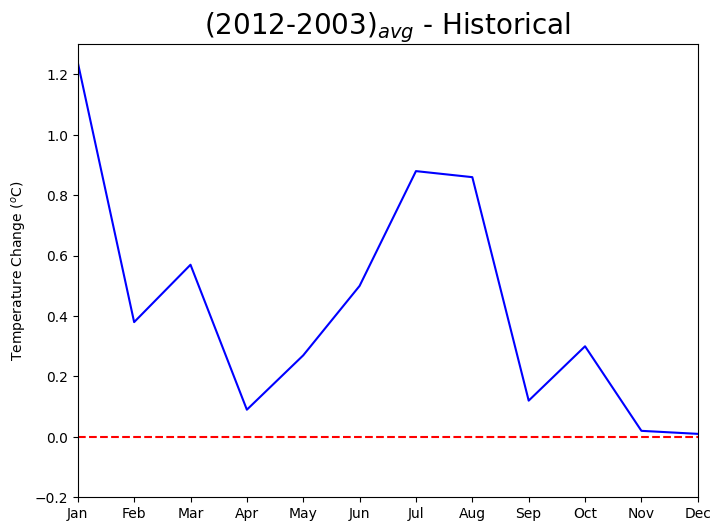

In [49]:
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(111)
ax.plot(months.values(),diff_mean_temp,'b-')
ax.set_ylabel('Temperature Change ($^o$C)')
ax.set_xlim([0,11])
ax.set_ylim(-0.2,1.3)
ax.plot([0,11],[0,0],'r--')
plt.title('(2012-2003)$_{avg}$ - Historical', fontsize=20)
plt.show()

In [50]:
diff_Total_Rainfall = monthly_mean_recent.Total_Rain - Monthly_Mean.Total_Rain

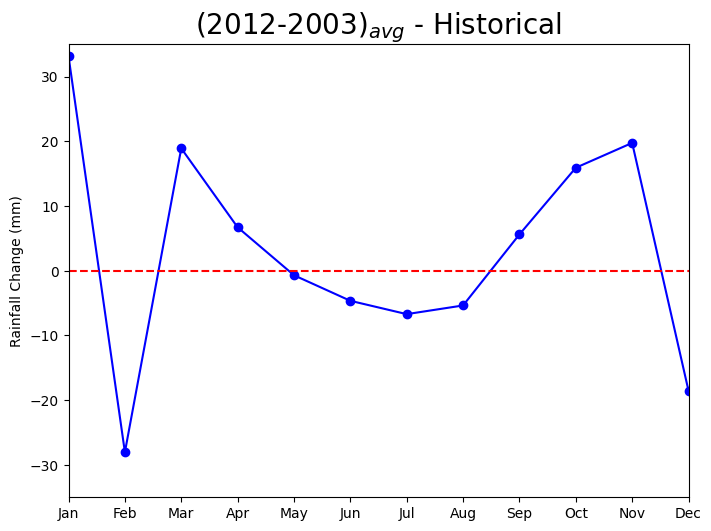

In [51]:
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(111)
ax.plot(months.values(),diff_Total_Rainfall,'ob-')
ax.set_ylabel('Rainfall Change (mm)')
ax.set_xlim([0,11])
ax.set_ylim(-35,35)
ax.plot([0,11],[0,0],'r--')
plt.title('(2012-2003)$_{avg}$ - Historical', fontsize=20)
plt.show()

## Recent Seasonal Average Data

In [52]:
seasonal_recent = np.round(df_recent.groupby('season').mean(),1)
seasonal_recent

,lon,lat,Year,Month,Mean_Temp,Total_Rain
season,,,,,,
DJF,-123.2,49.2,2007.5,5.0,4.4,128.1
JJA,-123.2,49.2,2007.5,7.0,17.5,33.8
MAM,-123.2,49.2,2007.5,4.0,9.6,85.8
SON,-123.2,49.2,2007.5,10.0,10.4,125.4


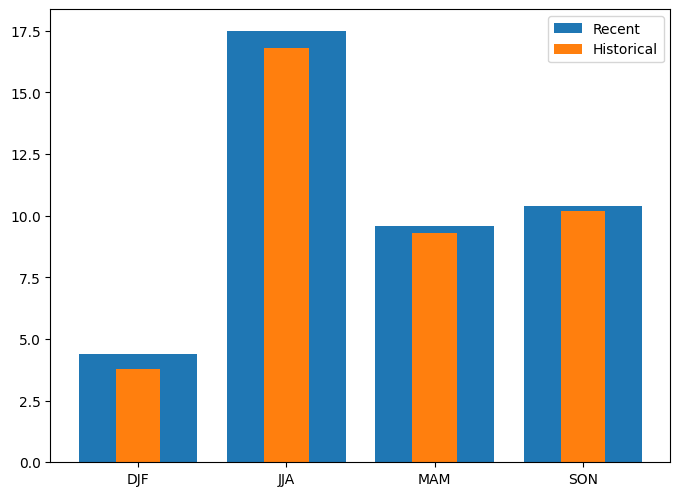

In [53]:
seasons_name = ['DJF','JJA','MAM','SON']
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(111)
width=0.3
ax.bar(seasons_name,seasonal_recent.Mean_Temp,label='Recent')
ax.bar(seasons_name,seasonal_val.Mean_Temp,width,label='Historical')
ax.legend()
plt.show()

## 30 years data (1951:1980)

In [54]:
df[df['Year']==1980] # df[168:528]

,lon,lat,Year,Month,Mean_Temp,Total_Rain,datetime,season
516,-123.18,49.2,1980,1,0.5,73.5,1980-01-01,DJF
517,-123.18,49.2,1980,2,5.7,188.5,1980-02-01,DJF
518,-123.18,49.2,1980,3,5.7,124.3,1980-03-01,MAM
519,-123.18,49.2,1980,4,10.0,71.1,1980-04-01,MAM
520,-123.18,49.2,1980,5,12.3,52.7,1980-05-01,MAM
521,-123.18,49.2,1980,6,14.2,107.0,1980-06-01,JJA
522,-123.18,49.2,1980,7,16.6,67.6,1980-07-01,JJA
523,-123.18,49.2,1980,8,16.4,22.8,1980-08-01,JJA
524,-123.18,49.2,1980,9,13.9,97.9,1980-09-01,SON
525,-123.18,49.2,1980,10,10.8,57.8,1980-10-01,SON


In [55]:
df_30yrs = df[168:528] # climate data from 1951-1980

In [56]:
df_30yrs_Mean_Temp = np.round(df_30yrs.groupby('Year').mean().mean().Mean_Temp,2)
df_30yrs_Mean_Temp

9.78

In [57]:
Tdiff = df.groupby('Year').mean().Mean_Temp - df_30yrs_Mean_Temp

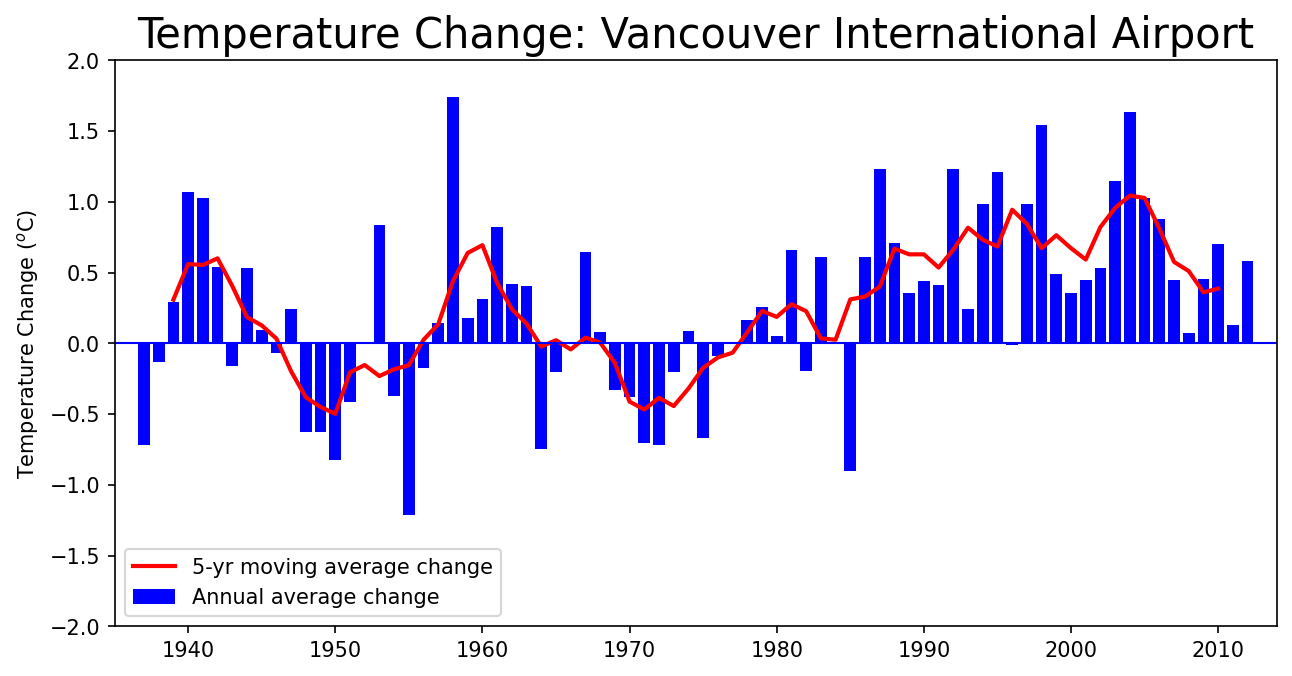

In [58]:
fig = plt.figure(figsize=(10,5),dpi=150)
ax = fig.add_subplot(111)
ax.bar(year_val,Tdiff,color='b',label='Annual average change')
ax.set_ylabel('Temperature Change ($^o$C)')
ax.set_xlim([1935,2014])
ax.plot(Tdiff.rolling(window=5,min_periods=5,center=True).mean(),label= '5-yr moving average change',color='r',linewidth=2)
ax.plot([0,2014],[0,0],color='b',linewidth=1)
ax.set_ylim([-2,2])


plt.title('Temperature Change: Vancouver International Airport', fontsize=20)
plt.legend()
plt.show()